In [47]:
import pandas as pd


In [48]:
df = pd.read_csv("./buys_computer.csv")

In [49]:
df.head()

,age,income,student,credit_rating,buys_computer
0,youth,low,no,fair,yes
1,youth,high,yes,excellent,no
2,youth,high,no,fair,yes
3,middle,medium,yes,fair,yes
4,senior,low,yes,fair,yes


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x,y

(        age  income student credit_rating
 0     youth     low      no          fair
 1     youth    high     yes     excellent
 2     youth    high      no          fair
 3    middle  medium     yes          fair
 4    senior     low     yes          fair
 ..      ...     ...     ...           ...
 505   youth     low      no          fair
 506  senior     low      no     excellent
 507  middle    high     yes          fair
 508   youth  medium      no          fair
 509  senior     low     yes          fair
 
 [510 rows x 4 columns],
 0      yes
 1       no
 2      yes
 3      yes
 4      yes
       ... 
 505     no
 506     no
 507    yes
 508     no
 509     no
 Name: buys_computer, Length: 510, dtype: object)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.18)

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
preprosser = ColumnTransformer([
    ('ohe',OneHotEncoder(),['age', 'income', 'student', 'credit_rating'])
])

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
pipeline = Pipeline(steps=[
    ('preprosser',preprosser),
    ('classifier',DecisionTreeClassifier(criterion='entropy',max_depth=None))
])

In [58]:
pipeline

Pipeline(steps=[('preprosser',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['age', 'income', 'student',
                                                   'credit_rating'])])),
                ('classifier', DecisionTreeClassifier(criterion='entropy'))])

In [59]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprosser',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['age', 'income', 'student',
                                                   'credit_rating'])])),
                ('classifier', DecisionTreeClassifier(criterion='entropy'))])

In [60]:
y_pred=pipeline.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.7282608695652174

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,y_pred,)

array([[40, 14],
       [11, 27]], dtype=int64)

In [65]:
from sklearn.tree import plot_tree

In [66]:
tree_model=pipeline.named_steps.classifier

In [67]:
# %matplotlib qt 

In [68]:
import matplotlib.pyplot as plt

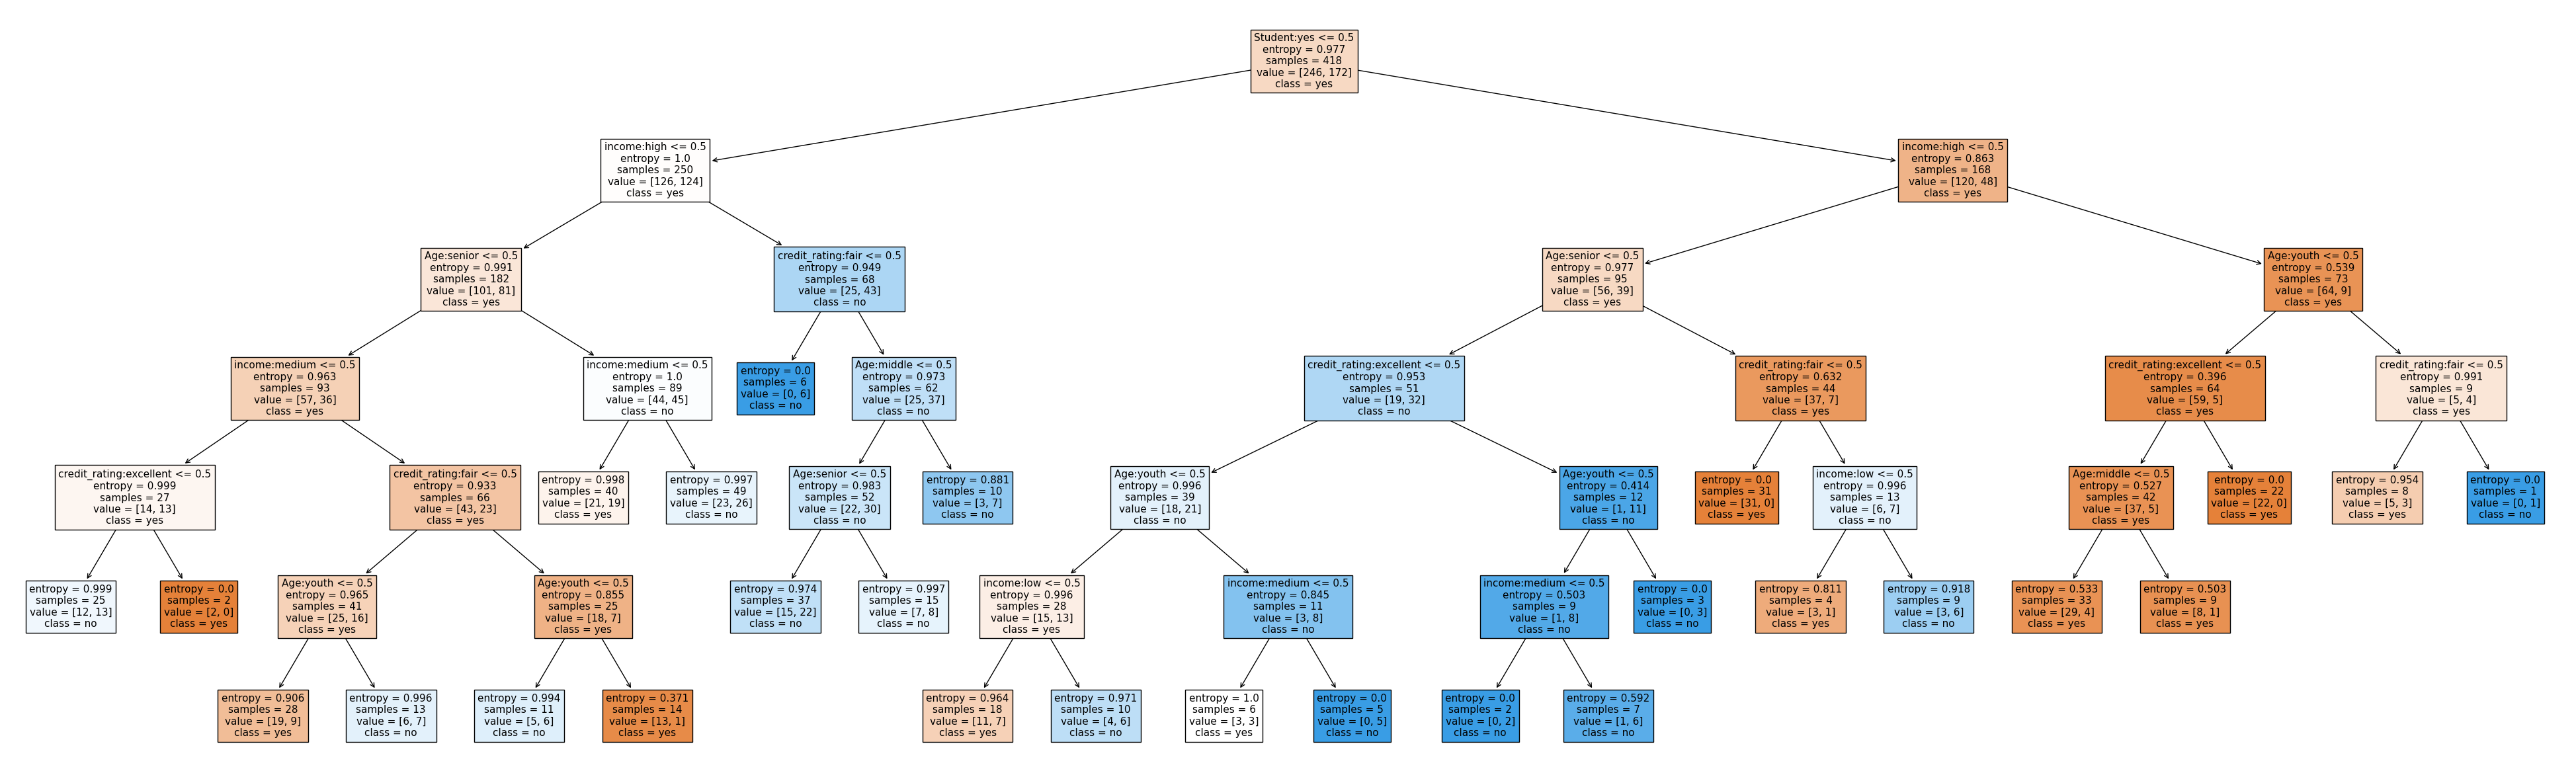

In [69]:
fig=plt.figure(figsize=(50,15))

class_names = ['yes', 'no']
feature_names = ['Age:youth', 'Age:middle', 'Age:senior', 'income:low', 'income:medium', 'income:high', 'Student:no', 'Student:yes', 'credit_rating:excellent', 'credit_rating:fair']


_=plot_tree(
    tree_model,
    max_depth=None,
    fontsize=11,
    feature_names=feature_names,
    class_names=class_names,
    filled=True
    )

fig.savefig("decistion_tree.png")

In [70]:
import pickle

In [71]:
pickle.dump(pipeline,open('model.pkl','wb'))

In [72]:
model = pickle.load(open("model.pkl",'rb'))

In [73]:

test_data = {
    'age': ['middle'],
    'student': ['no'],
    'income': ['low'],
    'credit_rating': ['excellent']
}

test_df = pd.DataFrame(test_data)


In [74]:
y_pred_test = pipeline.predict(test_df)
y_pred_test


array(['yes'], dtype=object)